# Import libraries 

In [1]:
import Classes
import helper
from matplotlib import pyplot as plt
import math
%matplotlib inline

# Example 1 - Mass connected to a spring

## 1.1 - Set parameters and generate object

In [2]:
# Set parameters
k = 10 #N/m; Stiffness
M = 200 #g; Mass
t_exp = 100 #s; Total time for the experiment
dt = 0.01 #s; time step

# Set initial conditions
x_0 = 1 #m; Initial position
v_0 = 0 #m/s; Initial speed

# Generate object
Mass = Classes.PointMass_1D(Mass = M, pos_init = x_0, v_init = v_0)

## 1.2 - Pipeline

In [3]:
while Mass.t < t_exp:
    # Calculate force
    F_r = -k*Mass.pos
    # Advance time_step, applying force
    Mass.advance_time_step(dt, F_r)

## 1.3 - Process and present results

Calculated natural period:  28.1
Measured zero (up)crossing period:  28.1
Measured zero (down)crossing period:  28.1
Measured peak period:  28.1


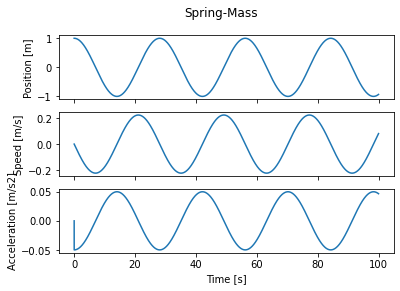

In [4]:
#Calculate natural period
T0 = 2*math.pi*math.sqrt(M/k) 

#Extract the results
time, X, V, A = helper.result2plot(Mass.history)

#Measure natural period
Tz_u = helper.zero_upcrossing_period(time, X)
Tz_d = helper.zero_downcrossing_period(time, X)
Tp = helper.peak_period(time, X)

#Show the results
print('Calculated natural period: ', round(T0,2))
print('Measured zero (up)crossing period: ', round(Tz_u,2))
print('Measured zero (down)crossing period: ', round(Tz_d,2))
print('Measured peak period: ', round(Tp,2))
helper.plot_n([time, X, V, A], ["Time [s]","Position [m]", "Speed [m/s]", "Acceleration [m/s2]"], 'Spring-Mass')

# Example 2 - Mass with external sinusoidal force

## 2.1 - Set parameters and generate object

In [20]:
# Set parameters
M = 200 #g; Mass
t_exp = 500 #s; Total time for the experiment
dt = 0.01 #s; time step
w = 0.1 #rad/s; angular frequency of the applied force
F0 = 100 #N; module of the applied force

# Set initial conditions
x_0 = 0 #m; Initial position
v_0 = 0 #m/s; Initial speed

# Generate object
Mass = Classes.PointMass_1D(M, x_0, v_0)

## 2.2 - Pipeline

In [21]:
# Prepare list to plot force
F_plot = [0]

# Pipeline
while Mass.t < t_exp:
    # Calculate force
    F = F0*math.cos(w*Mass.t)
    F_plot.append(F)
    # Advance time_step, applying force
    Mass.advance_time_step(dt, F)

## 2.3 - Process and present results

Force period:  62.83
Measured response zero (up)crossing period:  62.8
Measured response zero (down)crossing period:  62.86
Measured response peak period:  62.83


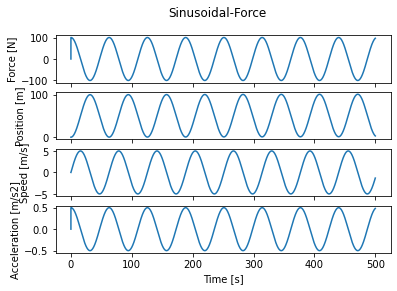

In [23]:
#Period of the force
T0 = 2*math.pi/w 

#Extract the results
time, X, V, A = helper.result2plot(Mass.history)

#Measure natural period of the response
Tp = helper.peak_period(time, X)
## Re-center X around average value
X_centered = helper.remove_offset(X)
Tz_u = helper.zero_upcrossing_period(time, X_centered)
Tz_d = helper.zero_downcrossing_period(time, X_centered)


#Plot the results
print('Force period: ', round(T0,2))
print('Measured response zero (up)crossing period: ', round(Tz_u,2))
print('Measured response zero (down)crossing period: ', round(Tz_d,2))
print('Measured response peak period: ', round(Tp,2))
helper.plot_n([time, F_plot, X, V, A], ["Time [s]","Force [N]", "Position [m]", "Speed [m/s]", "Acceleration [m/s2]"], 'Sinusoidal-Force')

# Example 3 - Mass with spring and external force (gravity)

## 3.1 - Set parameters and generate object

In [25]:
# Set parameters
k = 50 #N/m; Stiffness
M = 200 #g; Mass
t_exp = 100 #s; Total time for the experiment
dt = 0.01 #s; time step
Fext = -9.81*M #N; module of the applied force

# Set initial conditions
x_0 = 0 #m; Initial position
v_0 = 0 #m/s; Initial speed

# Generate object
Mass = Classes.PointMass_1D(M, x_0, v_0)

## 3.2 - Pipeline

In [26]:
# Prepare list to plot force
F_plot = [Fext]

# Pipeline
while Mass.t < t_exp:
    # Calculate force
    ## Spring force
    F_r = -k*Mass.pos
    # Advance time_step, applying force
    Mass.advance_time_step(dt, (Fext+F_r))

## 3.3 - Process and present results

Calculated sytem period:  12.57
Measured response zero (up)crossing period:  12.57
Measured response zero (down)crossing period:  12.57
Measured response peak period:  12.57


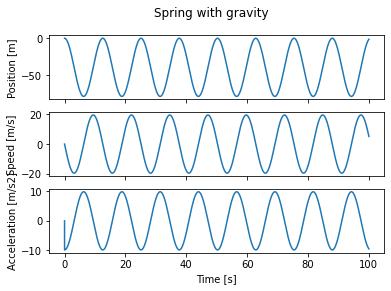

In [27]:
#System natural period
T0 = 2*math.pi*math.sqrt(M/k)

#Extract the results
time, X, V, A = helper.result2plot(Mass.history)

#Measure natural period of the response
Tp = helper.peak_period(time, X)
Tz_u = helper.zero_upcrossing_period(time, X)
Tz_d = helper.zero_downcrossing_period(time, X)

#Plot the results
print('Calculated sytem period: ', round(T0,2))
print('Measured response zero (up)crossing period: ', round(Tz_u,2))
print('Measured response zero (down)crossing period: ', round(Tz_d,2))
print('Measured response peak period: ', round(Tp,2))
helper.plot_n([time, X, V, A], ["Time [s]", "Position [m]", "Speed [m/s]", "Acceleration [m/s2]"], 'Spring with gravity')

# Example 4 - Mass with spring and external sinusoidal force

## 4.1 - Set parameters and generate object

In [28]:
# Set parameters
k = 50 #N/m; Stiffness
M = 200 #g; Mass
t_exp = 100 #s; Total time for the experiment
dt = 0.01 #s; time step
w = 0.5 #rad/s; angular frequency of the applied force
F0 = 100 #N; module of the applied force

# Set initial conditions
x_0 = 0 #m; Initial position
v_0 = 0 #m/s; Initial speed

# Generate object
Mass = Classes.PointMass_1D(M, x_0, v_0)

## 4.2 - Pipeline

In [29]:
# Prepare list to plot force
F_plot = [0]

# Pipeline
while Mass.t < t_exp:
    # Calculate force
    ## External force
    F = F0*math.cos(w*Mass.t)
    F_plot.append(F)
    ## Spring force
    F_r = -k*Mass.pos
    # Advance time_step, applying force
    Mass.advance_time_step(dt, (F+F_r))

## 4.3 - Process and present results

Force period:  12.57
Calculated sytem period:  12.57
Measured response zero (up)crossing period:  12.57
Measured response zero (down)crossing period:  12.57
Measured response peak period:  12.45


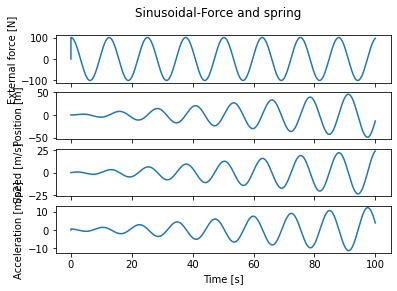

In [30]:
#Period of the force
Tf = 2*math.pi/w
#System natural period
T0 = 2*math.pi*math.sqrt(M/k)

#Extract the results
time, X, V, A = helper.result2plot(Mass.history)

#Measure natural period of the response
Tp = helper.peak_period(time, X)
Tz_u = helper.zero_upcrossing_period(time, X)
Tz_d = helper.zero_downcrossing_period(time, X)

#Plot the results
print('Force period: ', round(Tf,2))
print('Calculated sytem period: ', round(T0,2))
print('Measured response zero (up)crossing period: ', round(Tz_u,2))
print('Measured response zero (down)crossing period: ', round(Tz_d,2))
print('Measured response peak period: ', round(Tp,2))
helper.plot_n([time, F_plot, X, V, A], ["Time [s]","External force [N]", "Position [m]", "Speed [m/s]", "Acceleration [m/s2]"], 'Sinusoidal-Force and spring')

# Example 5 - Mass connected to a spring with damping

## 5.1 - Set parameters and generate object

In [ ]:
# Set parameters
k = 10 #N/m; Stiffness
B = 10 #Ns/m; 
M = 200 #g; Mass
t_exp = 100 #s; Total time for the experiment
dt = 0.01 #s; time step

# Set initial conditions
F_0 = 100 #N; Initial applied force (push)
x_0 = 0 #m; Initial position
v_0 = 0 #m/s; Initial speed

# Generate object
Mass = Classes.PointMass_1D(Mass = M, F_init= F_0, pos_init = x_0, v_init = v_0)